<a href="https://colab.research.google.com/github/pjdoucette/MAT422/blob/main/HW_3_5_%26_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.5 K-Means & 3.6 Support Vector Machine



---



#### Set up

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.svm import SVC




---



###K-Means

K-means clustering is a method for partitioning $n$ observations into $k$ clusters. It assigns each observation to the cluster with the nearest mean, which serves as a prototype of the cluster.

Given input data of the form $\{x_i : i = 1, \dots, n\}$, where each $x_i \in \mathbb{R}^d$ is a $d$-dimensional real vector, the goal is to partition observations into $k$ clusters $S = \{S_1, \dots, S_k\}$, minimizing the within-cluster sum of squares (WCSS):

$$
WCSS = \sum_{i=1}^k \sum_{x \in S_i} \| x - \mu(S_i) \|^2,
$$

where $\mu(S_i)$ is the mean of points in $S_i$, given by:

$$
\mu(S) = \frac{1}{|S|} \sum_{x \in S} x.
$$

The objective is to find:

$$
\arg \min_S \sum_{i=1}^k WCSS_i.
$$

**K-means Clustering Algorithm:**
1. Randomly select $k$ points as initial cluster centers.
2. Assign each observation to the nearest cluster center.
3. Calculate the centroid of each cluster.
4. Repeat steps 2 and 3 until cluster assignments stabilize.

**Convergence**

K-means converges as $\sum_{i=1}^k WCSS_i$ decreases with each iteration:
1. **Reassignment Step:** $\sum_{i=1}^k WCSS_i$ decreases as each vector is assigned to the nearest centroid.
2. **Recomputation Step:** The sum $\sum_{i=1}^k WCSS_i$ decreases further when each cluster's centroid is updated to the mean of points in that cluster.

This method ensures that $WCSS$ decreases until convergence, though it may converge to a local minimum given the NP-hard nature of the problem.


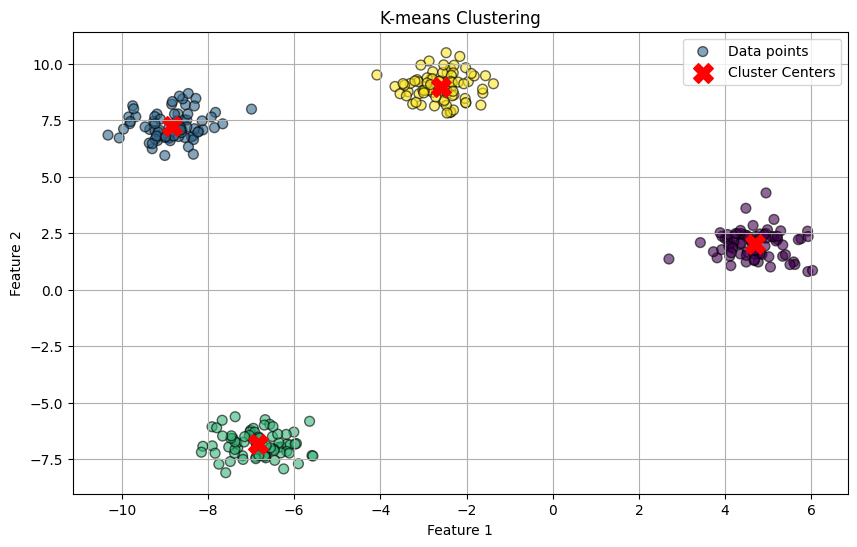

In [3]:

# Generate data
n_samples = 300
n_clusters = 4
X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=0.60, random_state=42)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Plot data points and cluster centers
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', marker='o', edgecolor='k', alpha=0.6, label="Data points")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Cluster Centers")

plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


###Support Vector Machine

SVMs are supervised learning models for classification and regression. The objective of the SVM algorithm is to find a hyperplane that distinctly classifies data points in a high-dimensional space. Given a set of training examples, each marked as belonging to one of two categories, an SVM finds a hyperplane that maximizes the margin between these categories.

For a training dataset of $n$ points in the form $(x_1, y_1), \dots, (x_n, y_n)$, where $y_i \in \{1, -1\}$ indicates the class, and each $x_i$ is a $p$-dimensional real vector, the goal is to maximize the margin distance between two parallel hyperplanes separating the two classes.

A hyperplane can be written as:

$$
w^T x - b = 0,
$$

where $w$ is the normal vector. If the data is linearly separable, two parallel hyperplanes can be defined by the equations:

$$
w^T x - b = 1
$$

and

$$
w^T x - b = -1.
$$

These hyperplanes define the margin, with the maximum-margin hyperplane lying halfway between them. For each $i$, we enforce:

$$
y_i (w^T x_i - b) \geq 1, \quad \text{for all } 1 \leq i \leq n.
$$

The objective is to minimize the following cost function, which includes a regularization term:

$$
\min_{w, b} \left( \lambda \|w\|^2 + \frac{1}{n} \sum_{i=1}^n \max \{0, 1 - y_i(\langle w, x_i \rangle - b)\} \right),
$$

where $\lambda$ adjusts the trade-off between margin size and correct classification.

**Gradient Descent for SVM**

Since the function is convex in $w$, we can apply gradient descent to find the minimum. Using stochastic gradient descent, we pick an $i$ at random and update as follows:

For $b$:

$$
\text{New } b = \text{Old } b - \beta \begin{cases}
y_i, & \text{if } 1 - y_i(w^T x_i - b) > 0, \\
0, & \text{otherwise},
\end{cases}
$$

and for $w$:

$$
\text{New } w = \text{Old } w - \beta \begin{cases}
2 \lambda w - \frac{1}{n} y_i x_i, & \text{if } 1 - y_i(w^T x_i - b) > 0, \\
2 \lambda w, & \text{otherwise}.
\end{cases}
$$


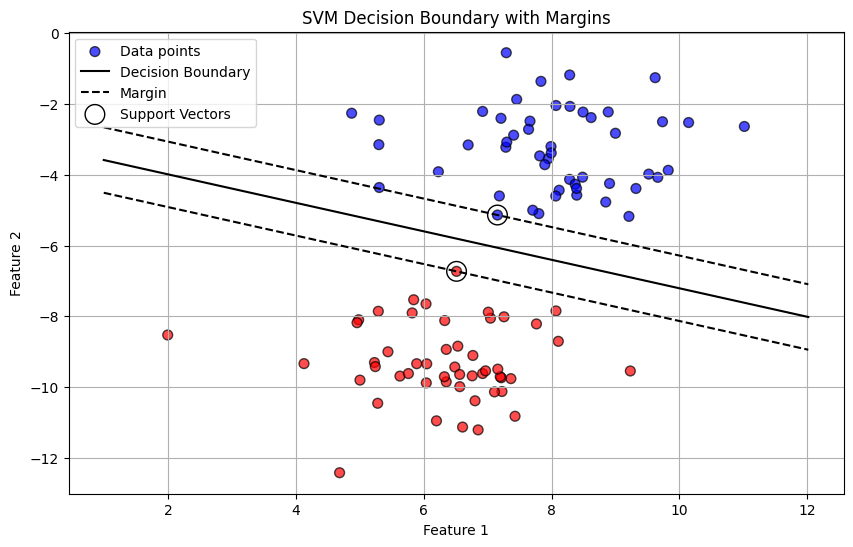

In [6]:
# Generate data
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.2)
y = np.where(y == 0, -1, 1)

# Fit SVM model
svm = SVC(kernel='linear', C=1e5)
svm.fit(X, y)

# Plot data points and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50, edgecolor='k', alpha=0.7, label="Data points")

# Separating hyperplane
w = svm.coef_[0]
b = svm.intercept_[0]
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1)
yy = -(w[0] / w[1]) * xx - b / w[1]

# Plot hyperplane and margins
plt.plot(xx, yy, 'k-', label="Decision Boundary")
margin = 1 / np.sqrt(np.sum(svm.coef_ ** 2))
yy_down = yy - np.sqrt(1 + (w[0] / w[1]) ** 2) * margin
yy_up = yy + np.sqrt(1 + (w[0] / w[1]) ** 2) * margin

plt.plot(xx, yy_down, 'k--', label="Margin")
plt.plot(xx, yy_up, 'k--')

# Plot support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=200, facecolors='none', edgecolor='k', label="Support Vectors")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary with Margins")
plt.legend()
plt.grid(True)
plt.show()